In [1]:
from sqlalchemy import create_engine
import pandas as pd
from pandas.io import sql
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [2]:
df = pd.read_csv('expense.csv')

In [3]:
df['TranDt'] = pd.to_datetime(df['TranDt'])
df_personal = df[df['TranCat']==214][['IncExpId', 'CasFil', 'Amount', 
                                      'TranDt', 'CourtOrdTran', 'CarFac']]
#Expense made in the category Miscellaneous
# df_misc = df[df['TranCat']==213][['IncExpId', 'CasFil', 'Amount', 
#                                       'TranDt', 'TranDescr', 'CourtOrdTran', 'CarFac']]
df_personal.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
list_people  = df_personal['CasFil'].unique()
print "Have personal expenses data for people", len(list_people)

df_personal.sort_values(['CasFil', 'TranDt'], inplace=True)



Have personal expenses data for people 7463


In [4]:
df_misc = df[df['TranCat']==213][['IncExpId', 'CasFil', 'Amount', 
                                      'TranDt', 'CourtOrdTran', 'CarFac']]
df_misc.sort_values(['CasFil', 'TranDt'], inplace=True)

In [5]:
df_misc_per = df[(df['TranCat']==213) | (df['TranCat']==214)][['IncExpId', 'CasFil', 'Amount', 
                                      'TranDt', 'CourtOrdTran', 'CarFac']]
df_misc.sort_values(['TranDt','CasFil'], inplace=True)

In [7]:
tran_cat = df['TranCat'].unique()

In [10]:
df['NoDays'] = (df['TranDt'] - df['TranDt'].min())/ np.timedelta64(1,'D')
# df['TranDt'].max()

In [16]:
def plot_timeseries(casefileID):
    '''
    Give a casefile ID to plot a timeseries. 
    '''
    df = df_personal
    df2 = df_misc

    mean_1 = round(df[df['CasFil']==casefileID]['Amount'].mean(), 2) 
    std_dev = round(df[df['CasFil']==casefileID]['Amount'].std(), 2)
    median_1 = round(df[df['CasFil']==casefileID]['Amount'].median(), 2)
    xmin = df[df['CasFil']==casefileID]['TranDt'].min()
    xmax = df[df['CasFil']==casefileID]['TranDt'].max()
    
    
    plt.figure(figsize=(10,7))
    plt.plot_date(df[df['CasFil']==casefileID]['TranDt'], df[df['CasFil']==casefileID]['Amount'], 'bo-', label='Personal Needs')
    plt.plot_date(df2[df2['CasFil']==casefileID]['TranDt'], df2[df2['CasFil']==casefileID]['Amount'], 'g+-', label = 'Misc Expense')

    plt.xlabel('Time of transaction')
    ylab = 'Amount spent for #' + str(casefileID)
    plt.ylabel(ylab)
    plt.hlines (median_1, xmin, xmax, color = '#696969', linestyles='dashed', label ='Median')
    plt.hlines (median_1 + 2 * std_dev, xmin, xmax, '#C0C0C0', 'dashed', label = 'Median + 2*std_dev' )
    plt.hlines (median_1 - std_dev, xmin, xmax, color = '#C0C0C0', linestyles='dashed', label = 'Median - std_dev')
    plt.legend()
    plt.show
    
    print 'Some statistics for these data are -'
    print 'Mean, Std Dev, Median'
    print mean_1, std_dev, median_1
    
    print 'Oldest and most recent dates are -'
    print xmin, xmax

Some statistics for these data are -
Mean, Std Dev, Median
10.44 8.93 7.88
Oldest and most recent dates are -
2014-06-12 00:00:00 2015-05-18 00:00:00


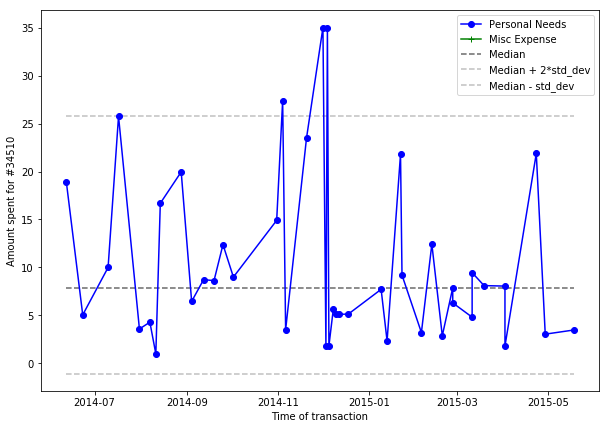

In [17]:
# plt.plot_date(df_personal[df_personal['CasFil']==34510]['TranDt'], df_personal[df_personal['CasFil']==34510]['Amount'], 'bo-')
plot_timeseries(34510)


<function matplotlib.pyplot.legend>

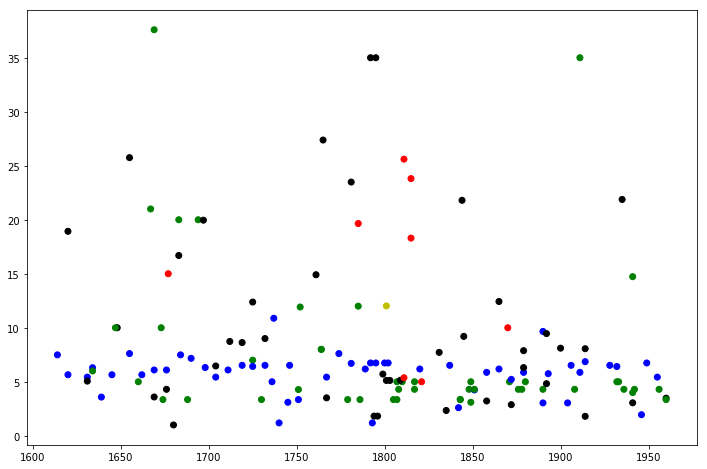

In [18]:
casefileID = 34510
plt.figure(figsize=(12,8))
categories = df[df['CasFil']==casefileID]['TranCat']
# plt.gca().set_color_cycle([dict_colour[i] for i in categories])

dict_colour = {196:'b', 214:'k', 189:'g', 199:'r', 203:'w', 217:'y'}

# plt.scatter(df[df['CasFil']==casefileID]['TranDt'], df[df['CasFil']==casefileID]['Amount'], c=[dict_colour[i] for i in categories] )
# plt.scatter(range(len(categories)), df[df['CasFil']==casefileID]['Amount'], c=[dict_colour[i] for i in categories])
plt.scatter(df[df['CasFil']==casefileID]['NoDays'], df[df['CasFil']==casefileID]['Amount'], c=[dict_colour[i] for i in categories])
plt.legend
# plt.plot(df[df['CasFil']==casefileID]['TranDt'], df[df['CasFil']==casefileID]['Amount'], color= df[df['CasFil']==casefileID]['TranCat'].apply(lambda x: dict_colour[x]))

In [21]:
df_piv = df.pivot_table(values=['Amount'], index=['CasFil'], columns='TranCat', aggfunc='sum') 
df_piv.fillna(0, inplace=True)

In [28]:
df.groupby(by='CasFil')['NoDays'].max() - df.groupby(by='CasFil')['NoDays'].min()

CasFil
4815       0.0
4816       0.0
4818       0.0
4820       0.0
4821       0.0
4826       0.0
4829       0.0
4832     454.0
4835       0.0
4838       0.0
4841       0.0
4843     420.0
4844     341.0
4845      37.0
4846     279.0
4848     341.0
4851     369.0
4852       0.0
4853     362.0
4854     278.0
4855     377.0
4859     364.0
4860     362.0
4862     362.0
4864     277.0
4865     444.0
4866     296.0
4867     346.0
4868     361.0
4869     229.0
         ...  
34317    342.0
34323    362.0
34334    367.0
34338    385.0
34367     36.0
34371    419.0
34373     18.0
34374    362.0
34375    353.0
34377    355.0
34406      0.0
34421    340.0
34422    334.0
34423    338.0
34430    364.0
34432     26.0
34444     17.0
34445    111.0
34452      0.0
34455    381.0
34462    386.0
34463     50.0
34464    379.0
34474    335.0
34475     53.0
34479    361.0
34483    261.0
34501     41.0
34509    346.0
34510    346.0
Name: NoDays, dtype: float64

In [27]:
df.head()

,Unnamed: 0,IncExpId,CasFil,Amount,TranDt,TranCat,TranDescr,CourtOrdTran,CarFac,NoDays
0,0,4673,4815,1250.0,2014-04-15,185,Care Facility,False,True,1562.0
1,1,4674,4815,104.0,2014-04-15,214,Personal Needs,False,False,1562.0
2,2,4675,4815,352.0,2014-04-15,240,Medical - Prescriptions,False,False,1562.0
3,3,4676,4816,500.0,2014-04-15,214,Personal Needs,False,False,1562.0
4,4,4677,4820,456.0,2014-04-15,239,Rent,False,False,1562.0


Some statistics for these data are -
Mean, Std Dev, Median
53.15 62.25 39.0
Oldest and most recent dates are -
2013-03-25 2014-06-01


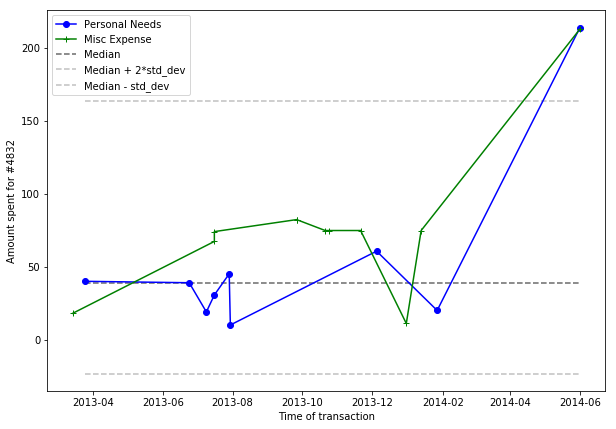

In [119]:
plot_timeseries(4832)
# plt.savefig('elderly_fraud_detection/images/ts_casefile=4832')

Some statistics for these data are -
Mean, Std Dev, Median
61.91 101.64 20.0
Oldest and most recent dates are -
2014-10-13 2015-09-28


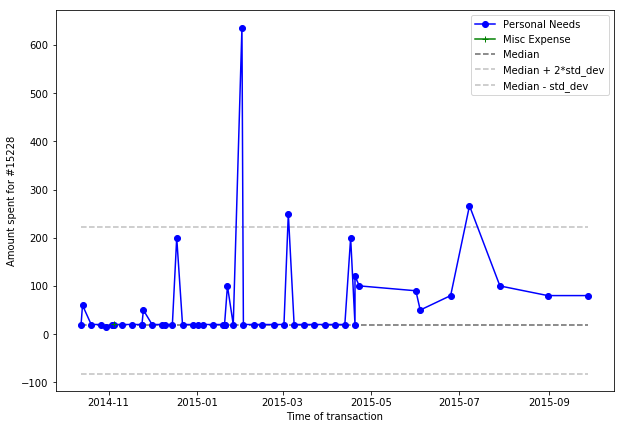

In [120]:
plot_timeseries(15228)

Some statistics for these data are -
Mean, Std Dev, Median
10.44 8.93 7.88
Oldest and most recent dates are -
2014-06-12 2015-05-18


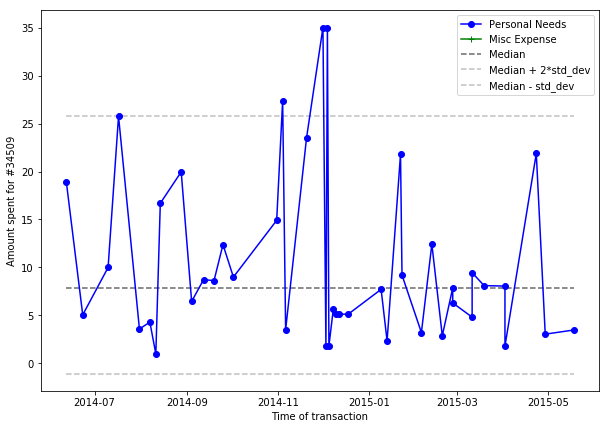

In [121]:
plot_timeseries(34509)

Some statistics for these data are -
Mean, Std Dev, Median
199.05 38.56 200.0
Oldest and most recent dates are -
2013-01-04 2013-12-31


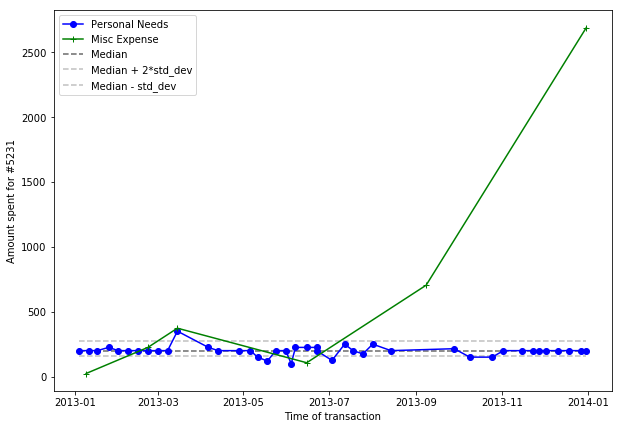

In [122]:
plot_timeseries(list_people[100])

In [130]:
casefileid = list_people[100]
df[(df['CasFil']==casefileid) & (df['TranCat']==213)]

,IncExpId,CasFil,Description,Amount,TranDt,TranCat,CourtOrdTran,CarFac
15899,22136,5231,check blanks,23.80,2013-01-09,213,0,0
15904,22141,5231,h. asche - moving van,225.00,2013-02-22,213,0,0
15909,22146,5231,"cullens, mattress",372.99,2013-03-15,213,0,0
15916,22154,5231,vet bill (arnette had pd),106.80,2013-06-15,213,0,0
15920,22159,5231,"bal due, weight set",704.37,2013-09-08,213,0,0
19524,25883,5231,adj beg cash to actual,2690.01,2013-12-31,213,0,0


Some statistics for these data are -
Mean, Std Dev, Median
94.44 16.67 100.0
Oldest and most recent dates are -
2013-07-01 2014-06-01


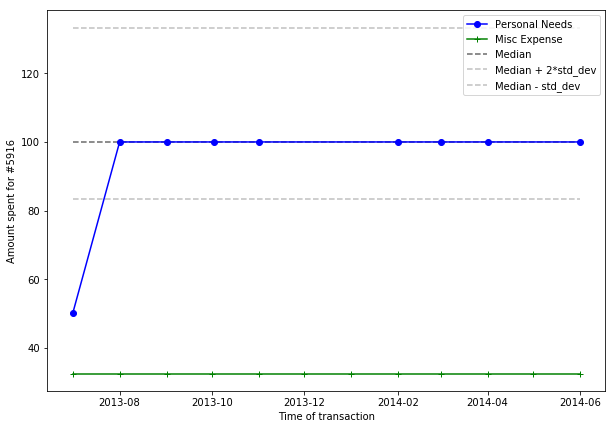

In [124]:
plot_timeseries(list_people[313])

In [82]:
plt.hlines?

In [87]:
def plot_timeseries(casefileID):
    '''
    Give a casefile ID to plot a timeseries. 
    '''
    df = df_misc_per

    mean_1 = round(df[df['CasFil']==casefileID]['Amount'].mean(), 2) 
    std_dev = round(df[df['CasFil']==casefileID]['Amount'].std(), 2)
    median_1 = round(df[df['CasFil']==casefileID]['Amount'].median(), 2)
    xmin = df[df['CasFil']==casefileID]['TranDt'].min()
    xmax = df[df['CasFil']==casefileID]['TranDt'].max()
    plt.plot_date(df[df['CasFil']==casefileID]['TranDt'], df[df['CasFil']==casefileID]['Amount'], 'bo-', label='Personal Needs')

    plt.xlabel('Time of transaction')
    ylab = 'Amount spent for #' + str(casefileID)
    plt.ylabel(ylab)
    plt.hlines (median_1 + 2 * std_dev, xmin, xmax, color = '#808080', linestyles='dashed')
    plt.hlines (median_1 - std_dev, xmin, xmax, color = '#808080', linestyles='dashed')
    plt.hlines (median_1, xmin, xmax, color = '#808080', linestyles='dashed')

    plt.legend()
    plt.show
    
    print 'Some statistics for these data are -'
    print 'Mean, Std Dev, Median'
    print mean_1, std_dev, median_1
    
    print 'Oldest and most recent dates are -'
    print xmin, xmax

Some statistics for these data are -
Mean, Std Dev, Median
10.44 8.93 7.88
Oldest and most recent dates are -
2014-06-12 2015-05-18


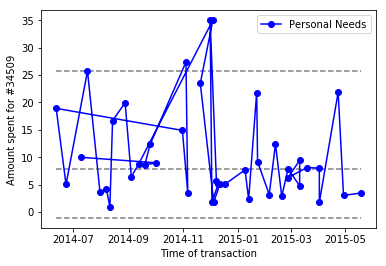

In [88]:
plot_timeseries(34509)

In [94]:
df_misc_per[df_misc_per['CasFil']==34509]

,IncExpId,CasFil,Amount,TranDt,CourtOrdTran,CarFac
1157601,1265298,34509,10.00,2014-07-10,0,0
1157636,1265333,34509,9.00,2014-10-02,0,0
1157638,1265335,34509,8.63,2014-09-19,0,0
1157639,1265336,34509,12.38,2014-09-25,0,0
1157643,1265340,34509,27.38,2014-11-04,0,0
1157648,1265345,34509,3.51,2014-11-06,0,0
1157649,1265346,34509,14.91,2014-10-31,0,0
1157650,1265347,34509,18.93,2014-06-12,0,0
1157651,1265348,34509,5.06,2014-06-23,0,0
1157653,1265350,34509,25.75,2014-07-17,0,0


7463